In [160]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [161]:
#loading dataset
train_features = pd.read_csv("dengue_features_train.csv")
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [162]:
train_features.shape

(1456, 24)

In [163]:
train_labels = pd.read_csv("dengue_labels_train.csv")
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [164]:
test_features = pd.read_csv("dengue_features_test.csv")

In [165]:
train_features.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [166]:
train_features.isnull().sum().sort_values(ascending=False)

ndvi_ne                                  194
ndvi_nw                                   52
station_diur_temp_rng_c                   43
station_avg_temp_c                        43
station_precip_mm                         22
ndvi_se                                   22
ndvi_sw                                   22
station_max_temp_c                        20
station_min_temp_c                        14
reanalysis_sat_precip_amt_mm              13
precipitation_amt_mm                      13
reanalysis_avg_temp_k                     10
reanalysis_air_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
week_start_date                            0
weekofyear                                 0
year      

In [167]:
test_features.isnull().sum().sort_values(ascending=False)

ndvi_ne                                  43
station_diur_temp_rng_c                  12
station_avg_temp_c                       12
ndvi_nw                                  11
station_min_temp_c                        9
station_precip_mm                         5
station_max_temp_c                        3
reanalysis_max_air_temp_k                 2
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
ndvi_sw                                   1
ndvi_se                                   1
week_start_date                           0
weekofyear                                0
year                            

In [168]:
train1=((train_features.isnull().sum()/train_features.shape[0])*100).sort_values(ascending=False)
train1[train1>0]

ndvi_ne                                  13.324176
ndvi_nw                                   3.571429
station_diur_temp_rng_c                   2.953297
station_avg_temp_c                        2.953297
station_precip_mm                         1.510989
ndvi_se                                   1.510989
ndvi_sw                                   1.510989
station_max_temp_c                        1.373626
station_min_temp_c                        0.961538
reanalysis_sat_precip_amt_mm              0.892857
precipitation_amt_mm                      0.892857
reanalysis_avg_temp_k                     0.686813
reanalysis_air_temp_k                     0.686813
reanalysis_dew_point_temp_k               0.686813
reanalysis_max_air_temp_k                 0.686813
reanalysis_min_air_temp_k                 0.686813
reanalysis_precip_amt_kg_per_m2           0.686813
reanalysis_relative_humidity_percent      0.686813
reanalysis_specific_humidity_g_per_kg     0.686813
reanalysis_tdtr_k              

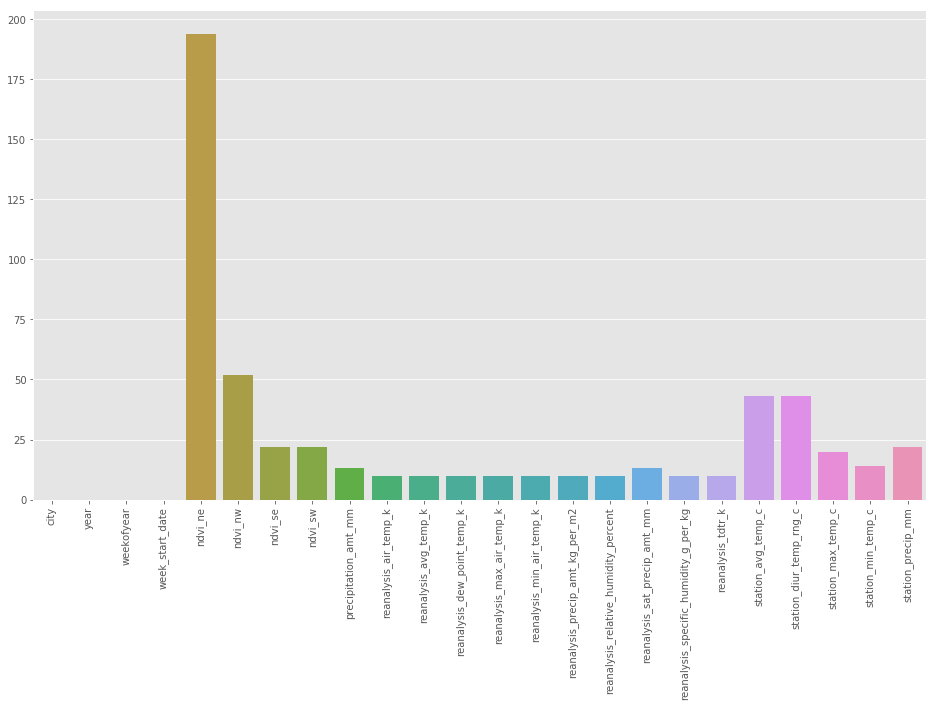

In [169]:
plot = sns.barplot(x = train_features.columns.values, y = train_features.isnull().sum())
plt.xticks(rotation=90)
plt.show()

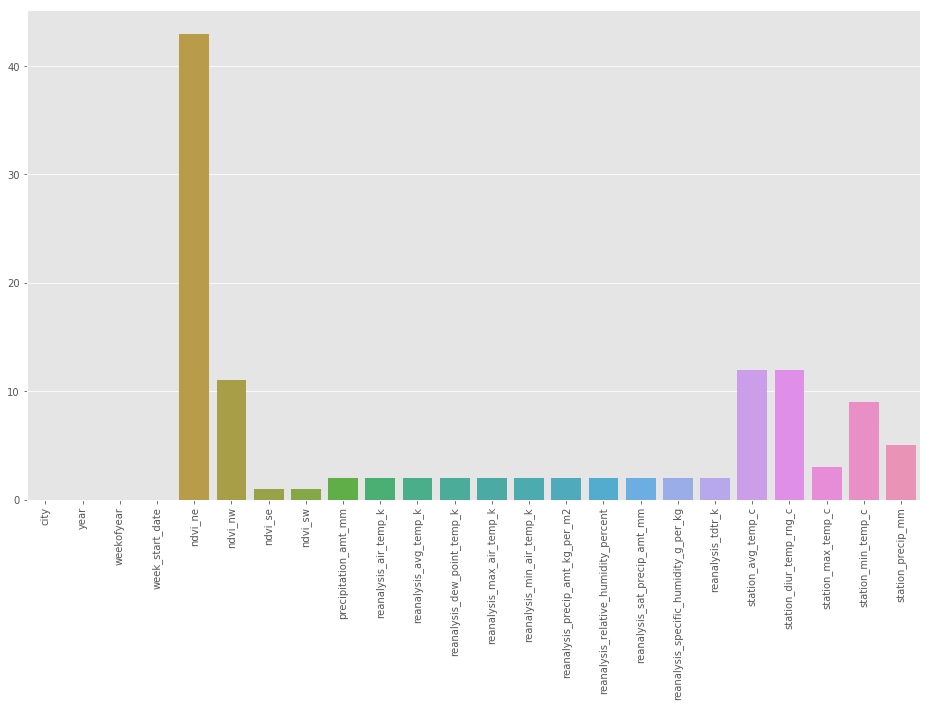

In [170]:
plot = sns.barplot(x = test_features.columns.values, y = test_features.isnull().sum())
plt.xticks(rotation=90)
plt.show()

In [171]:
x = [train_features, test_features]
for i in x:
    i['ndvi_ne'] = i['ndvi_ne'].fillna(np.mean(i['ndvi_ne']))
    i['ndvi_nw'] = i['ndvi_nw'].fillna(np.mean(i['ndvi_nw']))
    i['station_avg_temp_c'] = i['station_avg_temp_c'].fillna(np.mean(i['station_avg_temp_c']))
    i['station_diur_temp_rng_c'] = i['station_diur_temp_rng_c'].fillna(np.mean(i['station_diur_temp_rng_c']))
    i['ndvi_se'] = i['ndvi_se'].fillna(np.mean(i['ndvi_se']))
    i['ndvi_sw'] = i['ndvi_sw'].fillna(np.mean(i['ndvi_sw']))
    i['station_precip_mm'] = i['station_precip_mm'].fillna(np.mean(i['station_precip_mm']))
    i['station_max_temp_c'] = i['station_max_temp_c'].fillna(np.mean(i['station_max_temp_c']))
    i['station_min_temp_c'] = i['station_min_temp_c'].fillna(np.mean(i['station_min_temp_c']))
    i['precipitation_amt_mm'] = i['precipitation_amt_mm'].fillna(np.mean(i['precipitation_amt_mm']))
    i['reanalysis_sat_precip_amt_mm'] = i['reanalysis_sat_precip_amt_mm'].fillna(np.mean(i['reanalysis_sat_precip_amt_mm']))
    i['reanalysis_specific_humidity_g_per_kg'] = i['reanalysis_specific_humidity_g_per_kg'].fillna(np.mean(i['reanalysis_specific_humidity_g_per_kg']))
    i['reanalysis_relative_humidity_percent'] = i['reanalysis_relative_humidity_percent'].fillna(np.mean(i['reanalysis_relative_humidity_percent']))
    i['reanalysis_precip_amt_kg_per_m2'] = i['reanalysis_precip_amt_kg_per_m2'].fillna(np.mean(i['reanalysis_precip_amt_kg_per_m2']))
    i['reanalysis_tdtr_k'] = i['reanalysis_tdtr_k'].fillna(np.mean(i['reanalysis_tdtr_k']))
    i['reanalysis_min_air_temp_k'] = i['reanalysis_min_air_temp_k'].fillna(np.mean(i['reanalysis_min_air_temp_k']))
    i['reanalysis_max_air_temp_k'] = i['reanalysis_max_air_temp_k'].fillna(np.mean(i['reanalysis_max_air_temp_k']))
    i['reanalysis_dew_point_temp_k'] = i['reanalysis_dew_point_temp_k'].fillna(np.mean(i['reanalysis_dew_point_temp_k']))
    i['reanalysis_air_temp_k'] = i['reanalysis_air_temp_k'].fillna(np.mean(i['reanalysis_air_temp_k']))
    i['reanalysis_avg_temp_k'] = i['reanalysis_avg_temp_k'].fillna(np.mean(i['reanalysis_avg_temp_k']))

In [172]:
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [173]:
train_features['week_start_date'].dtype

dtype('O')

In [174]:
x = [train_features, test_features]
for i in x:
    i['week_start_date'] = pd.to_datetime(i['week_start_date'], format='%Y-%m-%d')
    
    i['day_start_date']=i['week_start_date'].dt.weekday
    i['year_start_date']=i['week_start_date'].dt.year
    i['quarter_start_date']=i['week_start_date'].dt.quarter
    i['month_start_date']=i['week_start_date'].dt.month

In [175]:
train_features.shape

(1456, 28)

In [176]:
x = [train_features, test_features]
for i in x:
    i.drop('week_start_date', axis=1, inplace=True)
train_features.shape

(1456, 27)

In [177]:
train_features.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,day_start_date,year_start_date,quarter_start_date,month_start_date
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,0,1990,2,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,0,1990,2,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,0,1990,2,5
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,0,1990,2,5
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,0,1990,2,5


In [182]:
x = [train_features, test_features]
for i in x:
    for j in i:
        if i[j].dtype == 'object':
            le = preprocessing.LabelEncoder()
            y = le.fit_transform(i[j])
            i[j]=y
train_features.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,day_start_date,year_start_date,quarter_start_date,month_start_date
0,1,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,0,1990,2,4
1,1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,0,1990,2,5
2,1,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,0,1990,2,5
3,1,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,0,1990,2,5
4,1,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,0,1990,2,5


In [183]:
test_features.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,day_start_date,year_start_date,quarter_start_date,month_start_date
0,1,2008,18,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,...,3.128571,26.528571,7.057143,33.3,21.7,75.2,1,2008,2,4
1,1,2008,19,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,...,2.571429,26.071429,5.557143,30.0,22.2,34.3,1,2008,2,5
2,1,2008,20,-0.00150,0.126803,0.151083,0.091529,3.66,299.455714,299.357143,...,4.428571,27.928571,7.785714,32.8,22.8,3.0,1,2008,2,5
3,1,2008,21,0.12605,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,...,4.342857,28.057143,6.271429,33.3,24.4,0.3,1,2008,2,5
4,1,2008,22,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,...,3.542857,27.614286,7.085714,33.3,23.3,84.1,1,2008,2,5


In [179]:
train_features['day_start_date'].value_counts()

0    295
5    234
1    225
3    208
2    208
6    156
4    130
Name: day_start_date, dtype: int64

In [184]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
